In [1]:
#!pip install openpyxl
#!pip install tqdm
#!pip install scikit-learn
#!pip install seaborn

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np
import seaborn as sns

In [2]:
df_1 = pd.read_excel('1.xlsx', 0, names=['id', 'product_name', 'ep_code', 'subcat'], dtype={'id': 'str', 'ep_code': 'str', 'subcat': 'str'})
df_2 = pd.read_excel('1.xlsx', 1, names=['ep_code', 'subcat', 'ds_count'], dtype={'ep_code': 'str', 'subcat': 'str', 'ds_count': 'int'})

In [3]:
df_1 = df_1.drop(df_1[df_1['ep_code'].str.contains(';')].index)
df_1['ep_sub_code'] = df_1['ep_code'].apply(lambda x: x.split('.')[-1])
df_1['ep_code'] = df_1['ep_code'].apply(lambda x: x.split('.')[0])
df_1['common_code'] = df_1['ep_code'] + '_' + df_1['ep_sub_code']

In [4]:
df_1.shape

(266649, 6)

In [5]:
df_1[df_1.duplicated(subset=['product_name', 'common_code'])].shape

(105723, 6)

In [6]:
df_1 = df_1.drop_duplicates(subset=['product_name', 'common_code'])

In [7]:
df_1.shape

(160926, 6)

/home/vladislav/Programming/projects/hakaton/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


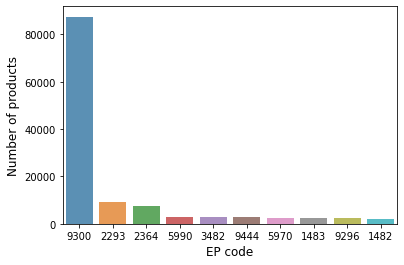

In [8]:
ep_code_counts = df_1['ep_code'].value_counts()[:10]
plt.figure()
sns.barplot(ep_code_counts.index, ep_code_counts.values, alpha=0.8)
plt.title('')
plt.ylabel('Number of products', fontsize=12)
plt.xlabel('EP code', fontsize=12)
plt.show()

/home/vladislav/Programming/projects/hakaton/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


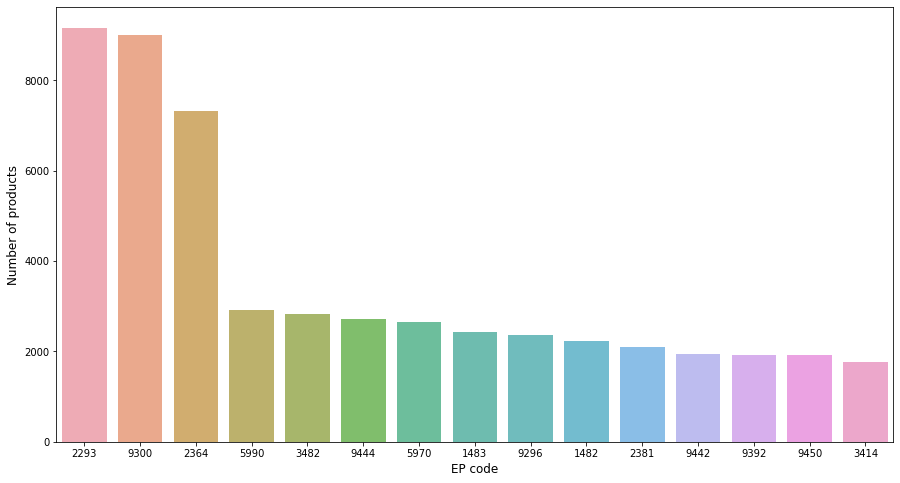

In [9]:
#df_1 = df_1.drop(df_1[df_1['ep_code'] == '9300'].index)
df_1 = df_1.drop(df_1[df_1['ep_code'] == '9300'].index[9000:])
ep_code_counts = df_1['ep_code'].value_counts()[:15]
plt.figure(figsize=(15,8))
sns.barplot(ep_code_counts.index, ep_code_counts.values, alpha=0.8)
plt.title('')
plt.ylabel('Number of products', fontsize=12)
plt.xlabel('EP code', fontsize=12)
plt.show()

In [10]:
df_1['words_count'] = df_1['product_name'].apply(lambda x: len(x.split()))

In [11]:
df_1['words_count'].describe().astype(int)

count    82448
mean        22
std         47
min          0
25%          6
50%         11
75%         22
max       1124
Name: words_count, dtype: int64

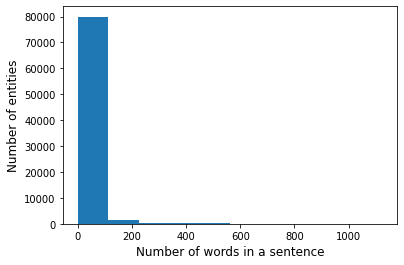

In [12]:
plt.hist(df_1['words_count'].values, bins=10)
plt.ylabel('Number of entities', fontsize=12)
plt.xlabel('Number of words in a sentence', fontsize=12)
plt.show()

In [13]:
df_1['product_name'] = df_1['product_name'].apply(lambda x: " ".join(x.split()[:25]))

/tmp/ipykernel_6865/3686817123.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['words_count'] = df_1['product_name'].apply(lambda x: len(x.split()))


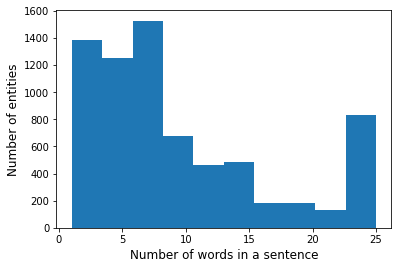

In [11]:
df_1['words_count'] = df_1['product_name'].apply(lambda x: len(x.split()))
plt.hist(df_1['words_count'].values, bins=10)
plt.ylabel('Number of entities', fontsize=12)
plt.xlabel('Number of words in a sentence', fontsize=12)
plt.show()

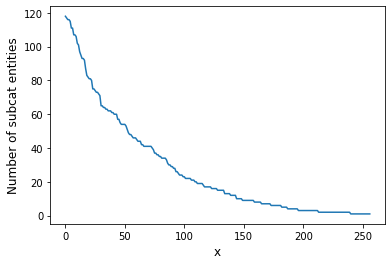

In [12]:
ep_code_counts = df_1['common_code'].value_counts()
plt.figure()
plt.plot(range(len(ep_code_counts)), ep_code_counts)
#sns.barplot(ep_code_counts.index, ep_code_counts.values, alpha=0.8)
plt.title('')
plt.ylabel('Number of subcat entities', fontsize=12)
plt.xlabel('x', fontsize=12)
plt.show()

In [16]:
df_1['common_code_count'] = df_1['common_code'].map(df_1['common_code'].value_counts())

In [17]:
print('Quantile 5%: ', df_1['common_code_count'].quantile(0.05), 'entities')

Quantile 5%:  69.0 entities


In [33]:
df_1 = df_1[df_1['common_code_count'] > df_1['common_code_count'].quantile(0.05)]

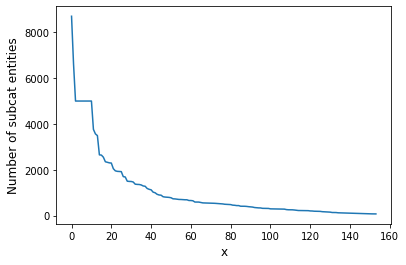

In [98]:
ep_code_counts = df_1['common_code'].value_counts()
plt.figure()
plt.plot(range(len(ep_code_counts)), ep_code_counts)
#sns.barplot(ep_code_counts.index, ep_code_counts.values, alpha=0.8)
plt.title('')
plt.ylabel('Number of subcat entities', fontsize=12)
plt.xlabel('x', fontsize=12)
plt.show()

In [35]:
#for i, row in df_1[:50].iterrows():
#    print(row['product_name'][:120],'|', row['ep_code'], row['ep_sub_code'])

In [36]:
#from preprocessing import unify_sym, process, process_pipeline
#lems = []
#for i, row in tqdm(df.iterrows()):
#    input_data = row['product_name'].strip()
#    res = unify_sym(input_data)
#    output = process(process_pipeline, text=res)
#    lems.append(output)
#    #print(" ".join(output))

In [69]:
from preprocessing import unify_sym, process, process_pipeline
import multiprocessing

def foo(x):
    input_data = x[1]['product_name'].strip()
    res = unify_sym(input_data)
    output = process(process_pipeline, text=res)
    return output

pool_obj = multiprocessing.Pool(15)
answer = pool_obj.map(foo, df_1.iterrows())

In [70]:
df_1.shape

(135957, 9)

In [71]:
#df_1 = df[:]
df_1['product_lems'] = answer
del answer

In [72]:
#df_1[['product_name', 'product_lems']][12323:12323+50]

In [73]:
#print(df_1.loc[12593]['product_name'])
#print(df_1.loc[12593]['product_lems'])

In [74]:
#df_1['goal'] = df_1['product_lems'].apply(lambda x: x[:20])

In [75]:
#df['product_lems'] = lems

In [76]:
#from sklearn.feature_extraction.text import TfidfVectorizer
#vectorizer = TfidfVectorizer(analyzer=lambda x: x, min_df=10)

In [77]:
def analyzer(x):
    return x

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(analyzer=analyzer, min_df=10)
matrix = vectorizer.fit_transform(np.array(df_1['product_lems']).tolist())
tfidf = dict(zip(vectorizer.get_feature_names_out(), vectorizer.idf_))
print ('vocab size :', len(tfidf))

vocab size : 7819


In [78]:
#matrix2=vectorizer.fit(np.array(df_1['goal']).tolist())

In [79]:
#matrix2

In [80]:
#matrix.toarray()

In [81]:
from sklearn.model_selection import train_test_split
X = matrix.toarray()[:]
y = df_1['common_code'][:]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [82]:
x_train.shape

(108765, 7819)

In [69]:
#x_train = matrix[:800].toarray()
#y_train = df['ep_code'].astype('int')[:800]
#x_test = matrix[800:].toarray()
#y_test = df['ep_code'].astype('int')[800:]

In [87]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(x_train, y_train)

/home/vladislav/Programming/projects/hakaton/venv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [88]:
clf.score(x_test, y_test)

0.8358

In [89]:
from sklearn.metrics import classification_report
print(classification_report(y_test, clf.predict(x_test)))

              precision    recall  f1-score   support

      1481_1       0.92      0.75      0.83        16
      1482_1       0.90      0.88      0.89       194
      1483_1       0.88      0.90      0.89       210
      1996_1       0.87      0.83      0.85        58
      2180_1       0.83      0.94      0.88        97
      2221_1       1.00      0.96      0.98       103
      2221_3       0.92      0.92      0.92        13
      2293_1       0.67      0.65      0.66       264
      2293_2       0.66      0.85      0.74       210
   2293_2293       0.00      0.00      0.00        13
      2293_3       0.80      0.72      0.76        57
      2293_4       0.86      0.66      0.75        29
      2293_5       0.73      0.68      0.70       145
      2293_6       0.62      0.38      0.48        13
      2293_7       0.94      0.78      0.85        37
      2364_1       0.96      0.97      0.96      1111
      2364_2       0.76      0.80      0.78       116
      2380_1       0.98    

/home/vladislav/Programming/projects/hakaton/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/vladislav/Programming/projects/hakaton/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/vladislav/Programming/projects/hakaton/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

In [39]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, clf.predict_proba(x_test), multi_class='ovr')

ValueError: Number of classes in y_true not equal to the number of columns in 'y_score'

In [40]:
y_test

12106     9300_1
47795     2364_1
193837    2381_3
76394     9391_1
180403    9444_3
           ...  
72971     9750_1
87722     9296_1
195602    2180_1
135457    5990_1
2479      9300_1
Name: common_code, Length: 10000, dtype: object

In [122]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(n_estimators=10, learning_rate=1.0,
    max_depth=3, random_state=0).fit(x_train, y_train)
clf.score(x_test, y_test)

KeyboardInterrupt: 

In [41]:
del clf

In [83]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=50, max_depth=None,
    min_samples_split=2, random_state=0)
rfc.fit(x_train, y_train)
print(rfc.score(x_test, y_test))
#scores = cross_val_score(rfc, x_train, y_train, cv=5)
#scores.mean()

0.8412400706090026


In [84]:
from sklearn.metrics import classification_report
print(classification_report(y_test, rfc.predict(x_test)))

              precision    recall  f1-score   support

      1481_1       0.94      0.84      0.89       116
      1482_1       0.94      0.91      0.92      1047
      1483_1       0.90      0.93      0.92      1033
      1991_1       0.95      0.95      0.95        22
      1996_1       0.93      0.91      0.92       355
      2180_1       0.88      0.97      0.92       292
      2221_1       0.96      0.97      0.96       158
      2221_3       0.97      0.89      0.93        44
      2293_1       0.75      0.71      0.73      1000
      2293_2       0.72      0.86      0.78       952
   2293_2293       0.38      0.10      0.16       153
      2293_3       0.86      0.83      0.84       386
      2293_4       0.82      0.71      0.76       235
      2293_5       0.80      0.84      0.82       889
      2293_6       0.77      0.66      0.71       139
      2293_7       0.86      0.82      0.84       182
      2364_1       0.94      0.96      0.95      1327
      2364_2       0.84    

In [122]:
s = 'Посуда из фарфора, в наборах и отдельными предметами: 1) кружка торговое название ВЭРДЕРА артикул 50381144 2) тарелка торговое название ВЭРДЕРА артикул 403748893) тарелка торговое название ВЭРДЕРА  артикул 50375001'
input_data = s.strip()
res = unify_sym(input_data)
output = process(process_pipeline, text=res)[:20]

In [123]:
output

['посуда_NOUN',
 'из_ADP',
 'фарфор_NOUN',
 'в_ADP',
 'набор_NOUN',
 'и_CCONJ',
 'отдельный_ADJ',
 'предмет_NOUN',
 'x_NUM',
 'кружок_NOUN',
 'торговый_ADJ',
 'название_NOUN',
 'вэрдера_NOUN',
 'артикул_NOUN',
 'xxxxxxxx_NUM',
 'x_NUM',
 'тарелка_NOUN',
 'торговый_ADJ',
 'название_NOUN',
 'вэрдера_NOUN']

In [125]:
t = vectorizer.transform([output])
p = rfc.predict(t.toarray())[0]
print(p)
df_1[df_1['common_code']==p]['subcat'].iloc[0]

5990_1


'Посуда керамическая (фарфоровая, полуфарфоровая, фаянсовая, майоликовая) для взрослых'

In [86]:
import pickle

In [87]:
with open('tfidf_latest.pickle', 'wb') as f:
    pickle.dump(vectorizer, f)
with open('rfc_latest.pickle', 'wb') as f:
    pickle.dump(rfc, f)

In [38]:
df_1.to_csv('total_new.csv', index=None)

# Bert

In [35]:
#!pip install transformers
#!pip install torch==1.10.0

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
/usr/share/python-wheels/urllib3-1.25.8-py2.py3-none-any.whl/urllib3/connectionpool.py:999: InsecureRequestWarning: Unverified HTTPS request is being made to host 'pypi.ngc.nvidia.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
     |████████████████████████████████| 3.1 MB 787 kB/s eta 0:00:01
/usr/share/python-wheels/urllib3-1.25.8-py2.py3-none-any.whl/urllib3/connectionpool.py:999: InsecureRequestWarning: Unverified HTTPS request is being made to host 'pypi.ngc.nvidia.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
     |████████████████████████████████| 764 kB 10.1 MB/s eta 0:00:01
/usr/share/python-wheels/urllib3-1.25.8-py2.py3-none-any.whl/urllib3/connectionpool.py:999: InsecureRequestWarning: Unverified HTTPS request is being made

In [126]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import torch
import transformers as ppb
import warnings
warnings.filterwarnings('ignore')

In [127]:
# For DistilBERT:
model_class, tokenizer_class, pretrained_weights = (ppb.DistilBertModel, ppb.DistilBertTokenizer, 'cointegrated/rubert-tiny') #'DeepPavlov/rubert-base-cased')

## Want BERT instead of distilBERT? Uncomment the following line:
#model_class, tokenizer_class, pretrained_weights = (ppb.BertModel, ppb.BertTokenizer, 'bert-base-uncased')

# Load pretrained model/tokenizer
tokenizer = tokenizer_class.from_pretrained(pretrained_weights)
model = model_class.from_pretrained(pretrained_weights)

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'BertTokenizer'. 
The class this function is called from is 'DistilBertTokenizer'.
You are using a model of type bert to instantiate a model of type distilbert. This is not supported for all configurations of models and can yield errors.
Some weights of the model checkpoint at cointegrated/rubert-tiny were not used when initializing DistilBertModel: ['bert.encoder.layer.2.intermediate.dense.weight', 'bert.encoder.layer.0.output.dense.weight', 'bert.encoder.layer.1.attention.output.LayerNorm.weight', 'bert.encoder.layer.1.attention.self.key.weight', 'bert.encoder.layer.0.attention.output.LayerNorm.weight', 'bert.encoder.layer.0.attention.output.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'bert.encoder.layer.2.attention.self.ke

In [128]:
tokenized = df_1[:50000]['product_name'].apply((lambda x: tokenizer.encode(x, add_special_tokens=True, max_length=512)))

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


In [180]:
#tokenized2 = df_1[50000:60000]['product_name'].apply((lambda x: tokenizer.encode(x, add_special_tokens=True, max_length=512)))
y2 = df_1[50000:60000]['ep_code'].astype(int)

In [129]:
max_len = 0
for i in tokenized.values:
    if len(i) > max_len:
        max_len = len(i)

padded = np.array([i + [0]*(max_len-len(i)) for i in tokenized.values])

In [178]:
max_len = 0
for i in tokenized2.values:
    if len(i) > max_len:
        max_len = len(i)

padded2 = np.array([i + [0]*(max_len-len(i)) for i in tokenized2.values])
attention_mask2 = np.where(padded2 != 0, 1, 0)
attention_mask2.shape
device = "cuda:0" if torch.cuda.is_available() else "cpu"
print(device)
input_ids2 = torch.tensor(padded2).to(device)
attention_mask2 = torch.tensor(attention_mask2).to(device)

model = model.to(device)

batch_size = 100
i = 0
features2 = []

with torch.no_grad():
    while i < len(tokenized2):
        print(i)
        last_hidden_states = model(input_ids2[i:i+batch_size], attention_mask=attention_mask2[i:i+batch_size])
        features2.append(last_hidden_states[0][:,0,:].cpu().numpy())
        i = i + batch_size
        #print(i)

cuda:0
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900


In [176]:
features2

[]

In [130]:
padded.shape

(50000, 287)

In [131]:
attention_mask = np.where(padded != 0, 1, 0)
attention_mask.shape

(50000, 287)

In [132]:
device = "cuda:0" if torch.cuda.is_available() else "cpu"
print(device)
input_ids = torch.tensor(padded).to(device)
attention_mask = torch.tensor(attention_mask).to(device)

model = model.to(device)

batch_size = 100
i = 0
features = []

with torch.no_grad():
    while i < len(tokenized):
        print(i)
        last_hidden_states = model(input_ids[i:i+batch_size], attention_mask=attention_mask[i:i+batch_size])
        features.append(last_hidden_states[0][:,0,:].cpu().numpy())
        i = i + batch_size
        #print(i)

cuda:0
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
1

In [184]:
#features = np.array(features).reshape(-1,312)
features2 = np.array(features2).reshape(-1,312)
#features = np.array(features).reshape(-1,768)

In [134]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2, learning_rate='auto',
                  init='random').fit_transform(features)

In [135]:
X_embedded.shape

(50000, 2)

In [166]:
group = df_1[:50000].reset_index()

In [162]:
group = group[group['common_code_count'] > 2000]

In [150]:
df_1[df_1['common_code']=='9300_1'][170:220]

,id,product_name,ep_code,subcat,ep_sub_code,common_code,words_count,common_code_count,product_lems
717,718,"лекарственное средство: ФУРАЦИЛИН, таблетки дл...",9300,"Лекарственные средства, зарегистрированные в у...",1,9300_1,20,11528,"[лекарственный_ADJ, средство_NOUN, фурацилин_P..."
719,720,"лекарственное средство: ФУРАЦИЛИН, таблетки дл...",9300,"Лекарственные средства, зарегистрированные в у...",1,9300_1,20,11528,"[лекарственный_ADJ, средство_NOUN, фурацилин_P..."
729,730,Лекарственное средство: Стрептоцид мазь для на...,9300,"Лекарственные средства, зарегистрированные в у...",1,9300_1,20,11528,"[лекарственный_ADJ, средство_NOUN, стрептоцид_..."
742,743,"лекарственное средство: Левомицетин, таблетки ...",9300,"Лекарственные средства, зарегистрированные в у...",1,9300_1,20,11528,"[лекарственный_ADJ, средство_NOUN, левомицетин..."
746,747,"лекарственное средство: Левомицетин, таблетки ...",9300,"Лекарственные средства, зарегистрированные в у...",1,9300_1,20,11528,"[лекарственный_ADJ, средство_NOUN, левомицетин..."
747,748,"Амлодипин, таблетки 5 мг, 30 шт., упаковки кон...",9300,"Лекарственные средства, зарегистрированные в у...",1,9300_1,20,11528,"[амлодипин_NOUN, таблетка_NOUN, x_NUM, миллигр..."
748,749,"Амлодипин, таблетки 5 мг, 30 шт., упаковки кон...",9300,"Лекарственные средства, зарегистрированные в у...",1,9300_1,20,11528,"[амлодипин_NOUN, таблетка_NOUN, x_NUM, миллигр..."
750,751,"Амлодипин, таблетки 10 мг, 30 шт., упаковки ко...",9300,"Лекарственные средства, зарегистрированные в у...",1,9300_1,20,11528,"[амлодипин_NOUN, таблетка_NOUN, xx_NUM, миллиг..."
751,752,"Амлодипин, таблетки 5 мг, 30 шт., упаковки кон...",9300,"Лекарственные средства, зарегистрированные в у...",1,9300_1,20,11528,"[амлодипин_NOUN, таблетка_NOUN, x_NUM, миллигр..."
752,753,Нолицин таблетки покрытые пленочной оболочкой ...,9300,"Лекарственные средства, зарегистрированные в у...",1,9300_1,13,11528,"[нолицин_NOUN, таблетка_NOUN, покрывать_VERB, ..."


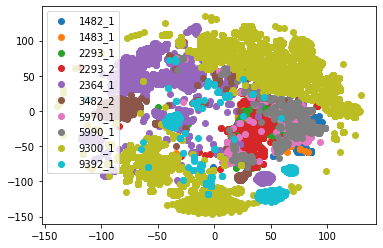

In [163]:
fig, ax = plt.subplots()
for g in np.unique(group['common_code']):
    #print(g)
    i = group[group['common_code'] == g].index
    ax.scatter(X_embedded[i, 0], X_embedded[i, 1], label=g)
ax.legend()
plt.show()

In [349]:
df_1[:][df_1[:]['common_code'] == '93001']['subcat'].unique()

array(['Лекарственные средства, зарегистрированные в установленном порядке и внесенные в государственный реестр, состоящие из смешанных и несмешанных продуктов для использования в терапевтических или профилактических целях, расфасованные в виде дозированных лекарственных форм или в упаковки для розничной продажи'],
      dtype=object)

In [167]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(features, group['ep_code'].astype('int'))

KNeighborsClassifier()

In [168]:
neigh.score(features, group['ep_code'].astype('int'))

0.88822

In [182]:
y2

200556    9444
200557    9444
200558    5970
200559    9433
200560    1483
          ... 
211411    5620
211412    5463
211413    3482
211414    9444
211415    5970
Name: ep_code, Length: 10000, dtype: int64

In [185]:
from sklearn.metrics import classification_report
print(classification_report(y2.values, neigh.predict(features2)))

              precision    recall  f1-score   support

        1481       0.75      0.57      0.65        21
        1482       0.72      0.89      0.79       236
        1483       0.74      0.94      0.82       264
        1996       0.75      0.81      0.78        57
        2180       0.74      0.82      0.78       169
        2221       0.88      0.85      0.87        53
        2293       0.80      0.94      0.86      1015
        2364       0.91      0.97      0.94      1029
        2380       0.84      0.95      0.89       100
        2381       0.92      0.85      0.88       342
        2386       0.24      0.18      0.20        45
        2387       0.31      0.22      0.25       157
        2388       0.95      0.81      0.87       176
        2440       0.63      0.71      0.67       235
        2514       0.71      0.89      0.79        27
        2526       0.80      0.80      0.80        10
        2553       0.80      1.00      0.89        16
        3411       0.90    

In [169]:
group['common_code'].unique()

array(['9300_1', '3482_2', '9444_4', '5270_1', '5463_1', '3411_2',
       '9300_9300', '3414_8', '5990_1', '2387_1', '3414_15', '9442_12',
       '2293_2', '2386_1', '1482_1', '5970_1', '5772_1', '9442_1',
       '1483_1', '2293_5', '9385_1', '9750_1', '9290_1', '2293_1',
       '2293_7', '9146_1', '9391_1', '9441_9', '9392_1', '1996_1',
       '3481_4', '9695_1', '2514_3', '2388_1', '2180_1', '2388_2',
       '5463_8', '9444_14', '5620_1', '3530_1', '2293_3', '9296_1',
       '2380_1', '2381_2', '2381_1', '9437_1', '2386_3', '2381_3',
       '5460_1', '9442_3', '9444_9', '2293_6', '2293_4', '9677_1',
       '5157_1', '2526_1', '9697_2', '3412_1', '9695_2', '3483_1',
       '9450_7', '3414_16', '9291_8', '9444_7', '2440_1', '1481_1',
       '9158_1', '9441_1', '5530_1', '9450_2', '5361_1', '9442_4',
       '9436_1', '9398_2', '3481_1', '2553_1', '9442_11', '3414_12',
       '9219_1', '5500_1', '9444_10', '5913_1', '9296_8', '9441_11',
       '3414_9', '9393_1', '9444_5', '9439_1', '929

In [170]:
neigh.predict([features[1]])

array([3482])

In [171]:
neigh.classes_

array([1481, 1482, 1483, 1996, 2180, 2221, 2293, 2364, 2380, 2381, 2386,
       2387, 2388, 2440, 2514, 2526, 2553, 3411, 3412, 3414, 3481, 3482,
       3483, 3530, 5157, 5270, 5361, 5460, 5463, 5500, 5530, 5620, 5743,
       5772, 5913, 5970, 5982, 5990, 7272, 8158, 8464, 9112, 9146, 9158,
       9180, 9219, 9290, 9291, 9295, 9296, 9300, 9385, 9388, 9391, 9392,
       9393, 9396, 9398, 9431, 9432, 9433, 9435, 9436, 9437, 9438, 9439,
       9441, 9442, 9444, 9450, 9451, 9480, 9677, 9692, 9695, 9697, 9750])

In [362]:
neigh.predict_proba([features[27]])

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [363]:
group['common_code']

0          93001
1          34822
2          34822
3          94444
4          52701
          ...   
4995    93009300
4996       93001
4997       93001
4998       93001
4999       93001
Name: common_code, Length: 5000, dtype: object

In [173]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=25, max_depth=None,
    min_samples_split=2, random_state=0)
rfc.fit(features, group['ep_code'].astype('int'))
print(rfc.score(features, group['ep_code'].astype('int')))
#scores = cross_val_score(rfc, x_train, y_train, cv=5)
#scores.mean()

0.98312


In [186]:
print(classification_report(y2.values, rfc.predict(features2)))

              precision    recall  f1-score   support

        1481       0.89      0.38      0.53        21
        1482       0.73      0.88      0.80       236
        1483       0.81      0.85      0.83       264
        1996       0.80      0.72      0.76        57
        2180       0.74      0.76      0.75       169
        2221       0.82      0.77      0.80        53
        2293       0.62      0.94      0.75      1015
        2364       0.54      0.95      0.68      1029
        2380       0.84      0.80      0.82       100
        2381       0.78      0.69      0.73       342
        2386       0.40      0.04      0.08        45
        2387       0.50      0.40      0.44       157
        2388       0.86      0.63      0.73       176
        2440       0.74      0.56      0.64       235
        2514       0.96      0.85      0.90        27
        2526       1.00      0.60      0.75        10
        2553       1.00      0.88      0.93        16
        3411       0.94    

In [27]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(features, group['ep_code'].astype('int'))

In [28]:
clf.score(features, group['ep_code'].astype('int'))

0.50312

In [29]:
from sklearn.metrics import f1_score

f1_score(group['ep_code'].astype('int'), clf.predict(features), average='micro')

0.50312

# Predict

In [373]:
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np
import pickle

from preprocessing import unify_sym, process, process_pipeline
from sklearn.linear_model import LogisticRegression


Loading the model...


In [374]:
def analyzer(x):
    return x
clf = pickle.load(open('linreg.pickle', 'rb'))
tfidf = pickle.load(open('tfidf.pickle', 'rb'))

In [3]:
df_1 = pd.read_csv('total.csv', dtype={'ep_code': str, 'ep_sub_code':str, 'common_code':str})

In [270]:
s = 'Распределительные устройства'
input_data = s.strip()
res = unify_sym(input_data)
output = process(process_pipeline, text=res)[:15]
t = tfidf.transform([output])
p = clf.predict(t.toarray())[0]
print(p)
df_1[df_1['common_code']==str(p)[:]]['subcat'].iloc[0]

NameError: name 'unify_sym' is not defined

In [269]:
df_1[df_1['ep_code']==str(92968)[:-1]]['subcat'].unique()

array(['Комбикорма и добавки белково-витаминные для непродуктивных животных',
       'Комбикорма-концентраты для свиней', 'Брикеты и гранулы кормовые',
       'Комбикорма-концентраты для крупного рогатого скота',
       'Белково-витаминно-минеральные и амидо-витаминно-минеральные концентраты',
       'Комбикорма полнорационные для сельскохозяйственной птицы',
       'Комбикорма для пушных зверей, кроликов и нутрий',
       'Комбикорма полнорационные для свиней',
       'Комбикорма гранулированные',
       'Комбикорма полнорационные гранулированные для кроликов',
       'Комбикорма-концентраты для кроликов и нутрий',
       'Продукция комбикормовой промышленности',
       'Комбикорма-концентраты для рабочих лошадей',
       'Комбикорма-концентраты для овец', 'Комбикорма для дичи',
       'Крупка комбикормовая', 'Комбикорма для прудовых карповых рыб',
       'Комбикорма-концентраты гранулированные для тренируемых и спортивных лошадей',
       'Комбикорма-концентраты гранулированные для о

In [211]:
df_1[df_1['ep_code']==str(341415)[:4]]['subcat'].value_counts()

Комплектные распределительные устройства      776
Комбикорма-концентраты для рабочих лошадей     10
Name: subcat, dtype: int64

In [215]:
df_1[df_1['ep_code']==str(341415)[:4]]['subcat'].value_counts()

Комплектные распределительные устройства                                                                                         776
Камеры сборные одностороннего обслуживания                                                                                       392
Выключатели силовые                                                                                                              390
Конденсаторы и конденсаторные установки                                                                                          258
Разъединители и заземлители, отделители и короткозамыкатели                                                                      210
Трансформаторы напряжения                                                                                                        145
Трансформаторы тока                                                                                                              142
Разрядники, ограничители перенапряжений                              

In [39]:
from sklearn.metrics import classification_report
print(classification_report(clf.predict(x_test), y_test))

              precision    recall  f1-score   support

        2531       0.91      1.00      0.95        10
       14811       0.70      0.95      0.80        41
       14821       0.90      0.91      0.91       610
       14831       0.94      0.88      0.91       704
       19911       0.38      1.00      0.56         5
       19961       0.90      0.89      0.90       166
       21801       0.97      0.82      0.89       286
       21822       0.00      0.00      0.00         0
       22211       0.98      0.95      0.96       166
       22212       0.68      1.00      0.81        17
       22213       0.96      0.82      0.88        55
       22214       0.71      1.00      0.83         5
       22215       0.00      0.00      0.00         0
       22931       0.65      0.65      0.65       697
       22932       0.76      0.62      0.68       799
       22933       0.63      0.85      0.72       151
       22934       0.56      0.81      0.66        84
       22935       0.70    

/home/vladislav/Programming/projects/hakaton/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/vladislav/Programming/projects/hakaton/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/vladislav/Programming/projects/hakaton/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

In [153]:
df_1[:1000000]['ep_code'].value_counts()

9300    159861
2293     12254
2364     12085
3482      5004
9392      4392
         ...  
9382         1
9387         1
2322         1
9386         1
3454         1
Name: ep_code, Length: 129, dtype: int64

In [154]:
df_1[df_1['ep_code'] == '9300']

,id,product_name,ep_code,subcat,ep_sub_code
0,1,"Парацетамол таблетки 500 мг 10 шт., упаковки я...",9300,"Лекарственные средства, зарегистрированные в у...",1
5,6,"лекарственное средство: ФУРАЦИЛИН, таблетки дл...",9300,"Лекарственные средства, зарегистрированные в у...",1
6,7,"Вода для инъекций буфус, растворитель для приг...",9300,"Лекарственные средства, зарегистрированные в у...",1
7,8,"лекарственное средство: ФУРАЦИЛИН, таблетки дл...",9300,"Лекарственные средства, зарегистрированные в у...",1
8,9,"Вода для инъекций буфус, растворитель для приг...",9300,"Лекарственные средства, зарегистрированные в у...",1
...,...,...,...,...,...
201763,261764,Стимовит – корм для пчёл.,9300,Препараты и средства химико-фармацевтические д...,2
206503,266504,Препараты и средства химико-фармацевтические д...,9300,Препараты и средства химико-фармацевтические д...,2
212307,272308,Препараты и средства химико-фармацевтические д...,9300,Препараты и средства химико-фармацевтические д...,2
212319,272320,Препараты и средства химико-фармацевтические д...,9300,Препараты и средства химико-фармацевтические д...,2


In [198]:
df2['common_code'].nunique()

259

In [18]:
import pandas as pd
df_new = pd.read_csv('new_df.csv', dtype={'ep_code': str})

In [19]:
df_new = df_new.drop(df_new[df_new['ep_code'].str.contains(';')].index)
df_new['ep_sub_code'] = df_new['ep_code'].apply(lambda x: x.split('.')[-1])
df_new['ep_code'] = df_new['ep_code'].apply(lambda x: x.split('.')[0])
df_new['common_code'] = df_new['ep_code'] + '_' + df_new['ep_sub_code']

In [21]:
print(df_new.shape)
df_new[df_new.duplicated(subset=['product_name', 'common_code'])].shape

(123122, 5)


(44472, 5)

In [22]:
df_new = df_new.drop_duplicates(subset=['product_name', 'common_code'])
df_new.shape

(78650, 5)

In [23]:
df_new['words_count'] = df_new['product_name'].apply(lambda x: len(x.split()))

In [24]:
df_new['common_code_count'] = df_new['common_code'].map(df_new['common_code'].value_counts())

In [25]:
df_new['ep_code'].value_counts()

2293    14121
2364     7134
5990     4915
5970     4458
1483     3985
        ...  
3183        1
3454        1
3181        1
2322        1
5341        1
Name: ep_code, Length: 88, dtype: int64

In [26]:
df_1.head()

,id,product_name,ep_code,subcat,ep_sub_code,common_code,words_count,common_code_count
0,1,"Парацетамол таблетки 500 мг 10 шт., упаковки я...",9300,"Лекарственные средства, зарегистрированные в у...",1,9300_1,25,8703
1,2,Перезаряжаемая литий-ионная батарея торговой м...,3482,Аккумуляторы и аккумуляторные батареи никель-м...,2,3482_2,8,2529
2,3,Перезаряжаемая литий-ионная батарея торговой м...,3482,Аккумуляторы и аккумуляторные батареи никель-м...,2,3482_2,8,2529
3,4,Аппарат вакуумно-лазерной терапии стоматологич...,9444,Приборы и аппараты для электролечения высокоча...,4,9444_4,8,526
4,5,Блоки оконные и балконные дверные из алюминиев...,5270,Блоки оконные и балконные дверные из алюминиев...,1,5270_1,17,282


In [27]:
a = []
for g in df_1['common_code'].unique():
    #print(g)
    if (df_1[df_1['common_code']==g]['common_code_count'] < 5000).all():
        delta = 5000 - df_1[df_1['common_code']==g]['common_code_count'].iloc[0]
        print(g, delta)
        d = df_new[df_new['common_code'] == g].iloc[:delta]
        for i, row in d.iterrows():
            a.append({
                'product_name': row['product_name'],
                'ep_code': row['ep_code'],
                'ep_sub_code': row['ep_sub_code'],
                'common_code': row['common_code'],
                'subcat': df_1[df_1['common_code']==g]['subcat'].iloc[0],
                'words_count': row['words_count'],
                'common_code_count': 5000
            })

3482_2 2471
9444_4 4474
5270_1 4718
5463_1 4577
3411_2 4551
3411_1 4931
9300_9300 4718
3414_8 4728
5990_1 2158
2387_1 4530
3414_15 4534
9442_12 4685
2293_2 2654
2386_1 4814
1482_1 2775
9300_2 4985
5970_1 2357
5772_1 4300
9442_1 4799
1483_1 2582
2293_5 3367
9385_1 4785
9750_1 4082
9290_1 4796
7272_14 4971
3481_3 4955
2293_1 2257
2293_7 4683
9146_1 4587
9391_1 4343
9441_9 4899
9392_1 3467
1996_1 4393
3481_4 4705
9695_1 4555
2514_3 4818
2388_1 4346
2180_1 4310
2388_2 4609
5463_8 4767
9444_14 4811
5620_1 4660
3530_1 4737
9291_7 4989
2293_3 4255
9296_1 4086
2380_1 4368
2381_2 3868
0253_1 4991
2381_1 4795
9437_1 4466
2386_3 4842
2381_3 4384
5460_1 4567
0253_0253 4997
9442_3 4451
9444_9 4748
9350_1 4993
2293_6 4791
5445_1 4980
2293_4 4560
9677_1 4671
2431_1 4976
5157_1 4879
2526_1 4931
9697_2 4587
3412_1 4425
9695_2 4833
3482_6 4942
3483_1 4351
9442_10 4965
9450_7 4311
3414_16 4804
9291_8 4892
9450_1 4928
9296_10 4935
2514_5 4959
9444_7 4456
7272_12 4979
2440_1 3873
1481_1 4776
9158_1 4782
93

In [28]:
len(a)

60750

In [29]:
df_1.shape

(82448, 8)

In [30]:
df_1 = pd.concat([df_1, pd.DataFrame(a)])

In [31]:
df_1.shape

(143198, 8)

/home/vladislav/Programming/projects/hakaton/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


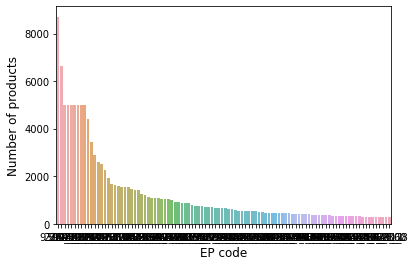

In [53]:
ep_code_counts = df_1['common_code'].value_counts()[:100]
plt.figure()
sns.barplot(ep_code_counts.index, ep_code_counts.values, alpha=0.8)
plt.title('')
plt.ylabel('Number of products', fontsize=12)
plt.xlabel('EP code', fontsize=12)
plt.show()

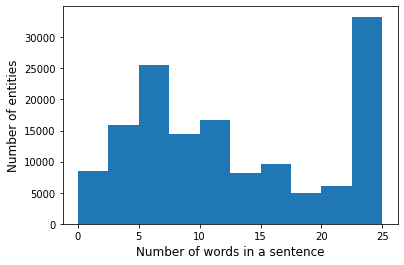

In [23]:
plt.hist(df_1['words_count'].values, bins=10)
plt.ylabel('Number of entities', fontsize=12)
plt.xlabel('Number of words in a sentence', fontsize=12)
plt.show()

In [49]:
df_1['product_name'] = df_1['product_name'].apply(lambda x: " ".join(x.split()[:25]))

/tmp/ipykernel_6865/2757442322.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['product_name'] = df_1['product_name'].apply(lambda x: " ".join(x.split()[:25]))


/tmp/ipykernel_6865/3686817123.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['words_count'] = df_1['product_name'].apply(lambda x: len(x.split()))


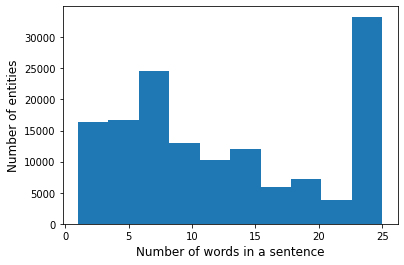

In [50]:
df_1['words_count'] = df_1['product_name'].apply(lambda x: len(x.split()))
plt.hist(df_1['words_count'].values, bins=10)
plt.ylabel('Number of entities', fontsize=12)
plt.xlabel('Number of words in a sentence', fontsize=12)
plt.show()

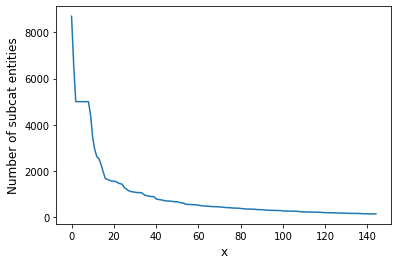

In [67]:
ep_code_counts = df_1['common_code'].value_counts()
plt.figure()
plt.plot(range(len(ep_code_counts)), ep_code_counts)
#sns.barplot(ep_code_counts.index, ep_code_counts.values, alpha=0.8)
plt.title('')
plt.ylabel('Number of subcat entities', fontsize=12)
plt.xlabel('x', fontsize=12)
plt.show()

In [52]:
df_1['common_code_count'] = df_1['common_code'].map(df_1['common_code'].value_counts())

/tmp/ipykernel_6865/1146859152.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['common_code_count'] = df_1['common_code'].map(df_1['common_code'].value_counts())


In [62]:
print('Quantile 5%: ', df_1['common_code_count'].quantile(0.05), 'entities')

Quantile 5%:  120.0 entities


In [65]:
df_1[df_1['common_code_count'] < df_1['common_code_count'].quantile(0.05)]['common_code'].nunique()

257

In [66]:
df_1 = df_1[df_1['common_code_count'] > df_1['common_code_count'].quantile(0.05)]

In [72]:
df_1.to_csv('total_all.csv', index=None)

In [2]:
df_1 = pd.read_csv('total_all.csv', dtype={'product_name': 'str','ep_code': 'str', 'subcat': 'str'})

In [3]:
df_1 = df_1.dropna(subset=['product_name'])

In [4]:
df_1.shape

(143188, 9)

In [11]:
a = df_1[['common_code', 'subcat']].drop_duplicates(subset=['common_code', 'subcat'])

In [15]:
a.to_dict('index')

{0: {'common_code': '9300_1',
  'subcat': 'Лекарственные средства, зарегистрированные в установленном порядке и внесенные в государственный реестр, состоящие из смешанных и несмешанных продуктов для использования в терапевтических или профилактических целях, расфасованные в виде дозированных лекарственных форм или в упаковки для розничной продажи'},
 1: {'common_code': '3482_2',
  'subcat': 'Аккумуляторы и аккумуляторные батареи никель-металлгидридной и литиевой систем'},
 3: {'common_code': '9444_4',
  'subcat': 'Приборы и аппараты для электролечения высокочастотные и квантовые: аппараты для высокочастотной электрохирургии, аппараты для УВЧ, коротковолновой терапии, аппараты для электролечения квантовые, аппараты для микроволновой терапии'},
 4: {'common_code': '5270_1',
  'subcat': 'Блоки оконные и балконные дверные из алюминиевых сплавов'},
 8: {'common_code': '5463_1',
  'subcat': 'Изделия из бумаги бытового и санитарно-гигиенического назначения: '},
 11: {'common_code': '3411_2', 

In [16]:
d = {}
for i, row in a.iterrows():
    d[row['common_code']] = row['subcat']

In [17]:
d

{'9300_1': 'Лекарственные средства, зарегистрированные в установленном порядке и внесенные в государственный реестр, состоящие из смешанных и несмешанных продуктов для использования в терапевтических или профилактических целях, расфасованные в виде дозированных лекарственных форм или в упаковки для розничной продажи',
 '3482_2': 'Аккумуляторы и аккумуляторные батареи никель-металлгидридной и литиевой систем',
 '9444_4': 'Приборы и аппараты для электролечения высокочастотные и квантовые: аппараты для высокочастотной электрохирургии, аппараты для УВЧ, коротковолновой терапии, аппараты для электролечения квантовые, аппараты для микроволновой терапии',
 '5270_1': 'Блоки оконные и балконные дверные из алюминиевых сплавов',
 '5463_1': 'Изделия из бумаги бытового и санитарно-гигиенического назначения: ',
 '3411_2': 'Трансформаторы силовые',
 '3411_1': 'Реакторы, включая реакторы токоограничивающие бетонные',
 '9300_9300': 'Медикаменты, химико-фармацевтическая продукция и продукция медицинског

In [5]:
df_1.head()

,id,product_name,ep_code,subcat,ep_sub_code,common_code,words_count,common_code_count,product_lems
0,1.0,"Парацетамол таблетки 500 мг 10 шт., упаковки я...",9300,"Лекарственные средства, зарегистрированные в у...",1,9300_1,25,8703,"['парацетамол_NOUN', 'таблетка_NOUN', 'xxx_NUM..."
1,2.0,Перезаряжаемая литий-ионная батарея торговой м...,3482,Аккумуляторы и аккумуляторные батареи никель-м...,2,3482_2,8,5000,"['перезаряжаемый_VERB', 'литий_NOUN', 'ионный_..."
2,3.0,Перезаряжаемая литий-ионная батарея торговой м...,3482,Аккумуляторы и аккумуляторные батареи никель-м...,2,3482_2,8,5000,"['перезаряжаемый_VERB', 'литий_NOUN', 'ионный_..."
3,4.0,Аппарат вакуумно-лазерной терапии стоматологич...,9444,Приборы и аппараты для электролечения высокоча...,4,9444_4,8,526,"['аппарат_PROPN', 'вакуумть_ADV', 'лазерный_AD..."
4,5.0,Блоки оконные и балконные дверные из алюминиев...,5270,Блоки оконные и балконные дверные из алюминиев...,1,5270_1,17,686,"['блок_NOUN', 'оконный_ADJ', 'и_CCONJ', 'балко..."


In [51]:
df_new

,Unnamed: 0,product_name,ep_code,ep_sub_code,common_code
0,0,"L-ТРЕОНИН 98,5% ( кормовой)",0110,1,0110_1
1,1,Камеры сборные одностороннего обслуживания сер...,0110,1,0110_1
2,2,RAJOL-WP80 Масло вазелиновое медицинское легко...,0253,1,0253_1
3,3,RAJOL-WP80 Масло вазелиновое медицинское легко...,0253,1,0253_1
4,4,Средства очищающие и смазочные для стоматологи...,0253,1,0253_1
...,...,...,...,...,...
123117,123117,Дрожжи кормовые упакованные в бумажные или пол...,9750,1,9750_1
123118,123118,Продукты для кормления животных: Actipro 44 EP...,9750,1,9750_1
123119,123119,Белковая кормосмесь упакованная в бумажные или...,9750,1,9750_1
123120,123120,Смесь кормовая,9750,1,9750_1
